RESOURCES

https://www.bestbrokers.com/forex-brokers/ais-power-demand-calculating-chatgpts-electricity-consumption-for-handling-over-78-billion-user-queries-every-year/

https://mlco2.github.io/impact/#compute

https://en.wikipedia.org/wiki/Jevons_paradox

https://tinyml.substack.com/p/the-cost-of-inference-running-the

https://carbon.scaledown.xyz/


https://chromewebstore.google.com/detail/carbon-scaledown/jofapkamgblhjajlppnaiomcjhnllhnd

https://ai.stackexchange.com/questions/38970/how-much-energy-consumption-is-involved-in-chat-gpt-responses-being-generated


https://github.com/JonathanChavezTamales/LLMStats/tree/main



In [1]:
from flask import Flask, request, jsonify
import os
import openai
import tiktoken

In [5]:
prompt = "This is AAAI Hackathon"

In [12]:
encoding = tiktoken.get_encoding("cl100k_base")
encoding = tiktoken.encoding_for_model("gpt-4")

num_tokens = len(encoding.encode(prompt))
encoded_text = encoding.encode(prompt)
print("Encoded text",encoded_text)

decoded_text = encoding.decode(encoded_text)
print("Encoding decoded",decoded_text)

decoded_text_bytes=[]
for i in range(num_tokens):
    decoded_text = encoding.decode_single_token_bytes(encoded_text[i])
    print(decoded_text)
    decoded_text_bytes.append(decoded_text)
    
# decoded_text_bytes = encoding.decode_single_token_bytes(encoded_text)
print("Decoded text bytes",decoded_text_bytes)

num_tokens

Encoded text [2028, 374, 48197, 40, 36082, 24893]
Encoding decoded This is AAAI Hackathon
b'This'
b' is'
b' AAA'
b'I'
b' Hack'
b'athon'
Decoded text bytes [b'This', b' is', b' AAA', b'I', b' Hack', b'athon']


6

In [17]:
print(0.3 / 1_000_000)
print(0.3 / 1000000)
print((0.3 / 1_000_000) == (0.3 / 1000000))  # This should print True


3e-07
3e-07
True


In [18]:
1.8e-06 * 1000

0.0018

In [16]:
def compare_encodings(example_string: str) -> None:
    """Prints a comparison of three string encodings."""
    # print the example string
    print(f'\nExample string: "{example_string}"')
    # for each encoding, print the # of tokens, the token integers, and the token bytes
    for encoding_name in ["r50k_base", "p50k_base", "cl100k_base", "o200k_base"]:
        encoding = tiktoken.get_encoding(encoding_name)
        token_integers = encoding.encode(example_string)
        num_tokens = len(token_integers)
        token_bytes = [encoding.decode_single_token_bytes(token) for token in token_integers]
        print()
        print(f"{encoding_name}: {num_tokens} tokens")
        print(f"token integers: {token_integers}")
        print(f"token bytes: {token_bytes}")
        
compare_encodings("This is AAAI Hackathon")


Example string: "This is AAAI Hackathon"

r50k_base: 6 tokens
token integers: [1212, 318, 25734, 40, 18281, 12938]
token bytes: [b'This', b' is', b' AAA', b'I', b' Hack', b'athon']

p50k_base: 6 tokens
token integers: [1212, 318, 25734, 40, 18281, 12938]
token bytes: [b'This', b' is', b' AAA', b'I', b' Hack', b'athon']

cl100k_base: 6 tokens
token integers: [2028, 374, 48197, 40, 36082, 24893]
token bytes: [b'This', b' is', b' AAA', b'I', b' Hack', b'athon']

o200k_base: 6 tokens
token integers: [2500, 382, 68599, 40, 47848, 31327]
token bytes: [b'This', b' is', b' AAA', b'I', b' Hack', b'athon']


In [ ]:
encoding = tiktoken.get_encoding("cl100k_base")
encoding = tiktoken.encoding_for_model("gpt-4")
print(encoding)
num_tokens = len(encoding.encode(prompt))
print(encoding.encode(prompt))
num_tokens

In [2]:
!pip install dotenv

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install backend dependencies did not run successfully.
  │ exit code: 1
  ╰─> [35 lines of output]
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/145.4 kB ? eta -:--:--
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 143.4/145.4 kB 4.6 MB/s eta 0:00:01
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 2.4 MB/s eta 0:00:00
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished with status 'done'
        Preparing metadata (pyproject.toml): started
        Preparing metadata (pyproject.toml): finished with status 'error'
        error: subprocess-exited-with-error
      
        × Preparing metadata (pypro

In [5]:
import os
import openai
import json
# from dotenv import load_dotenv

# Load API keys
# load_dotenv()
# OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# Hardcoded model ranking (initially) - will be updated dynamically
MODEL_SCORES = {
    "code": {"gpt-4": 90, "codellama": 95, "mistral": 85},
    "qa": {"gpt-4": 95, "claude-3": 92, "gemini": 88},
    "math": {"gpt-4-turbo": 98, "mixtral": 89, "gemini": 85},
}

def choose_best_model(query_type):
    """Returns the best model based on past performance scores."""
    return max(MODEL_SCORES[query_type], key=MODEL_SCORES[query_type].get)

def get_llm_response(query, query_type):
    """Routes query to the best model and gets the response."""
    best_model = choose_best_model(query_type)
    print(f"Routing to: {best_model}")

    response = openai.ChatCompletion.create(
        model=best_model,
        messages=[{"role": "user", "content": query}]
    )
    
    return response["choices"][0]["message"]["content"]

# Example usage
if __name__ == "__main__":
    query = "Write a Python function for quicksort."
    print(get_llm_response(query, "code"))


Routing to: codellama


APIRemovedInV1: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


In [ ]:
from flask import Flask, request, jsonify
import os
import openai
import tiktoken

app = Flask(__name__)

OPEN_AI_API_KEY = os.getenv("OPEN_AI_API_KEY")
openai.api_key = OPEN_AI_API_KEY


def count_tokens(prompt):
    try:
        encoding = tiktoken.get_encoding("cl100k_base")
        encoding = tiktoken.encoding_for_model("gpt-4")
        num_tokens = len(encoding.encode(prompt))
        return num_tokens
    except:
        print("Error: Could not encode prompt")
        return len(prompt.split())



@app.route("/")
def home():
    return "Welcome to EcoGPT!"


@app.route("/process_prompt",methods=["POST"])
def process_prompt():
    data = request.json
    prompt = data.get("prompt","")
    model = data.get("model","gpt-4")
    estimated_tokens = count_tokens(prompt)         
    return jsonify({
            "prompt":prompt,
            "token_count":estimated_tokens,
    })

if __name__ == "__main__":
    app.run(debug=True)

In [ ]:
import requests
import os

# Your API key (get from environment variable or set directly)
api_key = os.getenv("EIA_API_KEY")

api_key = "BbmT1OPdhIhXM3oiWvYTkmyvPP3kkovBP2C0UT4K"

# The API URL from the response
api_url = "https://api.eia.gov/v2/electricity/rto/fuel-type-data/data/"

# Parameters for the request
params = {
    "api_key": api_key,  # Add your API key
    "frequency": "hourly",
    "data[0]": "value",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 5000
}

# For Texas specifically, add this parameter:
# params["facets[respondent][]"] = "ERCO"  # ERCOT (Texas)

# Make the request
response = requests.get(api_url, params=params)

if response.status_code == 200:
    data = response.json()
    print(f"Successfully retrieved {len(data.get('response', {}).get('data', []))} records")
    
    
    # Process the data to calculate carbon intensity
    # This will depend on the specific format of the returned data
else:
    print(f"Error: {response.status_code}")
    print(response.text)

In [7]:
!pip install matplotlib

  Using cached matplotlib-3.10.0-cp312-cp312-macosx_10_13_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_10_13_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-macosx_10_13_x86_64.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_10_13_x86_64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp312-cp312-macosx_10_13_x86_64.whl (8.2 MB)
Using cached contourpy-1.3.1-cp312-cp312-macosx_10_13_x86_64.whl (271 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp312-cp312-macosx_10_13_x86_64.whl (2.3 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-macosx_10_13_x86_64.whl (66 kB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


Data processed and saved. Latest carbon intensity: 0.0 gCO2/kWh


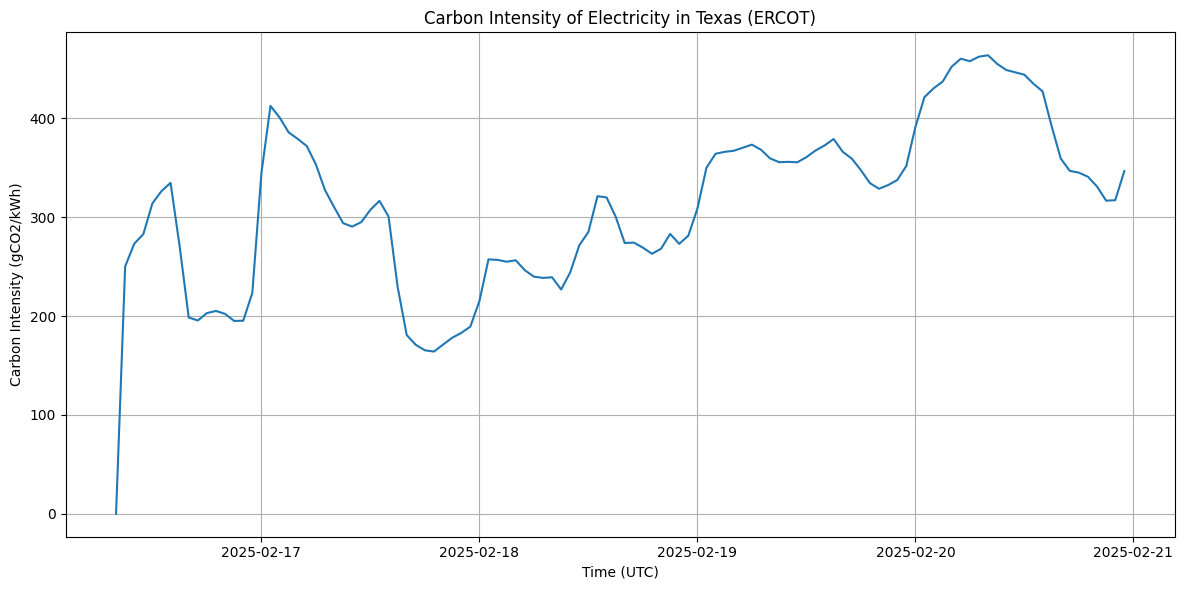

In [9]:
import requests
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Your API key
api_key = os.getenv("EIA_API_KEY")
api_key = "BbmT1OPdhIhXM3oiWvYTkmyvPP3kkovBP2C0UT4K"

# The API URL
api_url = "https://api.eia.gov/v2/electricity/rto/fuel-type-data/data/"

# Parameters for the request
params = {
    "api_key": api_key,
    "frequency": "hourly",
    "data[0]": "value",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 1000,  # Smaller for testing
    "facets[respondent][]": "ERCO"  # ERCOT (Texas)
}

# Make the request
response = requests.get(api_url, params=params)

if response.status_code == 200:
    data = response.json()
    
    # Convert to DataFrame
    df = pd.DataFrame(data.get('response', {}).get('data', []))
    
    # Convert period to datetime
    df['period'] = pd.to_datetime(df['period'])
    
    df['value'] = pd.to_numeric(df['value'], errors='coerce')

    
    # Create a pivot table to organize by fuel type
    pivot_df = df.pivot_table(
        index='period', 
        columns='fueltype', 
        values='value',
        aggfunc='sum'
    )
    
    # Fill NaN values with 0
    pivot_df = pivot_df.fillna(0)
    
    # Calculate total generation for each time period
    pivot_df['total'] = pivot_df.sum(axis=1)
    
    # Define carbon intensity factors (gCO2/kWh)
    carbon_factors = {
        'coal': 995,
        'natural gas': 465,
        'petroleum': 820,
        'nuclear': 0,
        'wind': 0,
        'solar': 0,
        'hydro': 0,
        'biomass': 230,
        'geothermal': 38,
        'other': 700
    }
    
    # Map EIA fuel types to our carbon factor categories (simplified mapping)
    fuel_mapping = {
        'COL': 'coal',
        'NG': 'natural gas',
        'PEL': 'petroleum',
        'NUC': 'nuclear',
        'WND': 'wind',
        'SUN': 'solar',
        'WAT': 'hydro',
        'OTH': 'other',
        'GEO': 'geothermal',
        'DPV': 'solar',
        'OIL': 'petroleum'
    }
    
    # Calculate carbon intensity
    carbon_intensity = []
    
    for idx, row in pivot_df.iterrows():
        total_gen = row['total']
        if total_gen > 0:
            intensity = 0
            for fuel in pivot_df.columns:
                if fuel != 'total' and fuel in fuel_mapping:
                    # Get percentage of this fuel in the mix
                    fuel_pct = row[fuel] / total_gen
                    # Add its contribution to carbon intensity
                    intensity += fuel_pct * carbon_factors[fuel_mapping[fuel]]
            carbon_intensity.append({'period': idx, 'carbon_intensity': intensity})
    
    # Create carbon intensity DataFrame
    carbon_df = pd.DataFrame(carbon_intensity)
    
    # Save to CSV
    pivot_df.to_csv('texas_generation_mix.csv')
    carbon_df.to_csv('texas_carbon_intensity.csv')
    
    print(f"Data processed and saved. Latest carbon intensity: {carbon_df['carbon_intensity'].iloc[0]:.1f} gCO2/kWh")
    
    # Optional: Plot carbon intensity over time
    plt.figure(figsize=(12, 6))
    plt.plot(carbon_df['period'], carbon_df['carbon_intensity'])
    plt.title('Carbon Intensity of Electricity in Texas (ERCOT)')
    plt.xlabel('Time (UTC)')
    plt.ylabel('Carbon Intensity (gCO2/kWh)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('carbon_intensity_trend.png')
    plt.show()
    
else:
    print(f"Error: {response.status_code}")
    print(response.text)

In [11]:
!pip install dotenv

  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [13]:
# carbon_intensity.py
import requests
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Load environment variables
load_dotenv()


class CarbonIntensityCalculator:
    """Fetch and process electricity generation data from EIA API."""
    
    def __init__(self, api_key=None):
        """Initialize with EIA API key."""
        self.api_key = api_key or os.getenv("EIA_API_KEY")
        if not self.api_key:
            print("Warning: EIA API key not found. Using estimated values.")
        
        # Carbon intensity factors by fuel type (gCO2/kWh)
        self.carbon_factors = {
            'coal': 995,
            'natural gas': 465,
            'petroleum': 820,
            'nuclear': 0,
            'wind': 0,
            'solar': 0,
            'hydro': 0,
            'biomass': 230,
            'geothermal': 38,
            'other': 700
        }
        
        # Map EIA fuel types to our carbon factor categories
        self.fuel_mapping = {
            'COL': 'coal',
            'NG': 'natural gas',
            'PEL': 'petroleum',
            'NUC': 'nuclear',
            'WND': 'wind',
            'SUN': 'solar',
            'WAT': 'hydro',
            'OTH': 'other',
            'GEO': 'geothermal',
            'DPV': 'solar',
            'OIL': 'petroleum'
        }
        
        # EIA balancing authorities (grid regions)
        self.regions = {
            "us-texas": "ERCO",  # ERCOT (Texas)
            "us-west": "CISO",   # California ISO
            "us-east": "NYIS",   # New York ISO
            "us-midwest": "MISO", # Midcontinent ISO
            "us-central": "SPP",  # Southwest Power Pool
        }
        
        # Cache for carbon intensity
        self.carbon_cache = {}
        self.cache_expiry = 3600  # 1 hour
    
    def get_current_carbon_intensity(self, region="us-texas"):
        """
        Get the current carbon intensity for a specific region.
        
        Args:
            region: Region code (e.g., 'us-texas')
            
        Returns:
            Current carbon intensity in gCO2/kWh
        """
        # Check cache first
        current_time = datetime.now().timestamp()
        if region in self.carbon_cache and (current_time - self.carbon_cache[region]['timestamp'] < self.cache_expiry):
            return self.carbon_cache[region]['intensity']
        
        # No API key or invalid region, return estimate
        if not self.api_key or region not in self.regions:
            estimated_values = {
                "us-texas": 420,  # ERCOT has moderate-high carbon intensity
                "us-west": 230,   # California has lower carbon intensity
                "us-east": 310,   # New York has moderate carbon intensity
                "us-midwest": 480, # Midwest has higher carbon intensity (coal)
                "us-central": 450  # Central US has higher carbon intensity
            }
            intensity = estimated_values.get(region, 400)
            
            # Cache the result
            self.carbon_cache[region] = {
                'timestamp': current_time,
                'intensity': intensity
            }
            
            return intensity
        
        try:
            # Get the EIA balancing authority code
            ba_code = self.regions.get(region)
            
            # API URL
            api_url = "https://api.eia.gov/v2/electricity/rto/fuel-type-data/data/"
            
            # Parameters for the request
            params = {
                "api_key": self.api_key,
                "frequency": "hourly",
                "data[0]": "value",
                "sort[0][column]": "period",
                "sort[0][direction]": "desc",
                "offset": 0,
                "length": 25,  # Get enough data for one timepoint
                "facets[respondent][]": ba_code
            }
            
            # Make the request
            response = requests.get(api_url, params=params)
            
            if response.status_code == 200:
                data = response.json()
                
                print("DATA",data)
                
                # Convert to DataFrame
                df = pd.DataFrame(data.get('response', {}).get('data', []))
                
                
                if len(df) == 0:
                    raise Exception("No data returned from API")
                
                # Convert period to datetime
                df['period'] = pd.to_datetime(df['period'])
                
                # Make sure 'value' is numeric
                df['value'] = pd.to_numeric(df['value'], errors='coerce')
                
                # Get the most recent period
                latest_period = df['period'].max()
                latest_data = df[df['period'] == latest_period]
                
                # Calculate total generation and generation by fuel type
                total_gen = latest_data['value'].sum()
                
                if total_gen <= 0:
                    raise Exception("Invalid generation data")
                
                # Calculate carbon intensity
                intensity = 0
                for _, row in latest_data.iterrows():
                    fuel = row['fueltype']
                    if fuel in self.fuel_mapping:
                        # Get percentage of this fuel in the mix
                        fuel_pct = row['value'] / total_gen
                        # Add its contribution to carbon intensity
                        intensity += fuel_pct * self.carbon_factors[self.fuel_mapping[fuel]]
                
                # Cache the result
                self.carbon_cache[region] = {
                    'timestamp': current_time,
                    'intensity': intensity
                }
                
                return intensity
            else:
                raise Exception(f"API Error: {response.status_code}")
        
        except Exception as e:
            print(f"Error getting carbon intensity: {e}")
            
            # Fall back to estimated values
            estimated_values = {
                "us-texas": 420,
                "us-west": 230,
                "us-east": 310,
                "us-midwest": 480,
                "us-central": 450
            }
            intensity = estimated_values.get(region, 400)
            
            # Cache the result
            self.carbon_cache[region] = {
                'timestamp': current_time,
                'intensity': intensity
            }
            
            return intensity
    
    def get_best_region(self):
        """
        Get the region with the lowest carbon intensity.
        
        Returns:
            Region code with lowest carbon intensity
        """
        intensities = {}
        for region in self.regions.keys():
            intensities[region] = self.get_current_carbon_intensity(region)
        
        return min(intensities, key=intensities.get)

# Example usage
if __name__ == "__main__":
    calculator = CarbonIntensityCalculator()
    for region in ["us-texas", "us-west", "us-east"]:
        intensity = calculator.get_current_carbon_intensity(region)
        print(f"Carbon intensity for {region}: {intensity:.1f} gCO2/kWh")
    
    best_region = calculator.get_best_region()
    print(f"Best region: {best_region}")

DATA {'response': {'warnings': [{'warning': 'incomplete return', 'description': 'The API can only return 5000 rows in JSON format.  Please consider constraining your request with facet, start, or end, or using offset to paginate results.'}], 'total': '381932', 'dateFormat': 'YYYY-MM-DD"T"HH24', 'frequency': 'hourly', 'data': [{'period': '2025-02-20T23', 'respondent': 'ERCO', 'respondent-name': 'Electric Reliability Council of Texas, Inc.', 'fueltype': 'BAT', 'type-name': 'Battery storage', 'value': '93', 'value-units': 'megawatthours'}, {'period': '2025-02-20T23', 'respondent': 'ERCO', 'respondent-name': 'Electric Reliability Council of Texas, Inc.', 'fueltype': 'COL', 'type-name': 'Coal', 'value': '9377', 'value-units': 'megawatthours'}, {'period': '2025-02-20T23', 'respondent': 'ERCO', 'respondent-name': 'Electric Reliability Council of Texas, Inc.', 'fueltype': 'NG', 'type-name': 'Natural Gas', 'value': '27498', 'value-units': 'megawatthours'}, {'period': '2025-02-20T23', 'responden

In [1]:
def calculate_co2_emissions(total_evaluation_time_seconds: float | None) -> float:
    if total_evaluation_time_seconds is None or total_evaluation_time_seconds <= 0:
        return -1

    # Power consumption for 8 H100 SXM GPUs in kilowatts (kW)
    power_consumption_kW = 5.6
    
    # Carbon intensity in grams CO₂ per kWh in Virginia
    carbon_intensity_g_per_kWh = 269.8
    
    # Convert evaluation time to hours
    total_evaluation_time_hours = total_evaluation_time_seconds / 3600
    
    # Calculate energy consumption in kWh
    energy_consumption_kWh = power_consumption_kW * total_evaluation_time_hours
    
    # Calculate CO₂ emissions in grams
    co2_emissions_g = energy_consumption_kWh * carbon_intensity_g_per_kWh
    
    # Convert grams to kilograms
    return co2_emissions_g / 1000

calculate_co2_emissions(10)

0.004196888888888889

CUDA is NVIDIA-Specific

- PyTorch’s torch.cuda API and most CUDA-based frameworks only work with NVIDIA GPUs.
- Since I have an AMD Radeon Pro 5300M, you won’t be able to use CUDA on macOS.

In [4]:
## Check GPU
import torch
if torch.cuda.is_available():
    print("GPU is available!")
else:
    print("No GPU detected.")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/anupamagaranisheshagiri/Documents/AAAI 2025/EcoGPT/venv/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/anupamagaranisheshagiri/Documents/AAAI 2025/EcoGPT/venv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/anupamagaranisheshagiri/Documents/AAAI 2025/EcoGPT/ve

No GPU detected.


In [17]:
import os
import time
open_ai_api_key=os.getenv("OPENAI_API_KEY")

In [21]:
from openai import OpenAI
client = OpenAI(api_key = open_ai_api_key)

inference_begin_time=time.time()
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {
            "role": "user",
            "content": "Write a haiku about recursion in programming."
        }
    ]
)
inference_end_time=time.time()
print(inference_end_time - inference_begin_time)

print(completion.choices[0].message.content)

0.6943669319152832
A call to itself,  
Layers of logic unfold,  
Endless paths converge.
